# Chicago Building Violations数据集的探索性分析与预处理

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
path="/home/fc/code/ChicagoBuildingViolations/building-violations.csv"

In [3]:
data = pd.read_csv(path)

In [4]:
data

,ID,VIOLATION LAST MODIFIED DATE,VIOLATION DATE,VIOLATION CODE,VIOLATION STATUS,VIOLATION STATUS DATE,VIOLATION DESCRIPTION,VIOLATION LOCATION,VIOLATION INSPECTOR COMMENTS,VIOLATION ORDINANCE,...,SSA,LATITUDE,LONGITUDE,LOCATION,Community Areas,Zip Codes,Boundaries - ZIP Codes,Census Tracts,Wards,Historical Wards 2003-2015
0,6392482,2019-12-04T12:40:09.000,2019-12-04T00:00:00.000,CN196019,OPEN,NaN,NO POSTED ADDRESS,OTHER : :OTHER,BUILDING ADRESSES - INCOMPLETE WITH MISSING #'S.,Post address of building in conspicuous place ...,...,NaN,41.749169,-87.602551,"{'latitude': '41.749169067345306', 'human_addr...",40.0,21546.0,61.0,247.0,35.0,9.0
1,6392480,2019-12-04T12:40:09.000,2019-12-04T00:00:00.000,CN061014,OPEN,NaN,REPAIR EXTERIOR WALL,OTHER : :OTHER,WEST AND SOUTH ELEVATIONS / EXTERIOR WALLS - M...,Failed to maintain the exterior walls of a bui...,...,NaN,41.749169,-87.602551,"{'latitude': '41.749169067345306', 'human_addr...",40.0,21546.0,61.0,247.0,35.0,9.0
2,6392335,2019-12-04T14:00:12.000,2019-12-04T00:00:00.000,CN138106,OPEN,NaN,STOP/REMOVE NUISANCE,OTHER : :OTHER,YARD AREA; ABANDON VEHICLE.,Remove and stop nuisance. (7-28-060),...,NaN,41.711751,-87.537842,"{'latitude': '41.71175105491413', 'human_addre...",49.0,21202.0,25.0,528.0,47.0,47.0
3,6391883,2019-12-04T08:32:01.000,2019-12-04T00:00:00.000,CN197039,OPEN,NaN,RELOCATE SMOKE DETECTOR,INTERIOR:003 :,HALLWAY - SMOKE DETECTOR - 4FT BELOW CEILING.,Relocate improperly installed smoke detectors....,...,25.0,41.844521,-87.712416,"{'latitude': '41.84452110252742', 'human_addre...",32.0,21569.0,57.0,755.0,28.0,14.0
4,6392369,2019-12-04T14:14:24.000,2019-12-04T00:00:00.000,CN065034,OPEN,NaN,REPAIR WINDOW SILLS,OTHER : :OTHER,EAST WINDOW SILLS; OPEN JOINTS.,Failed to maintain window sill in good repair ...,...,NaN,41.753908,-87.562784,"{'latitude': '41.75390787131238', 'human_addre...",39.0,22538.0,24.0,246.0,37.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677783,1479309,2006-07-14T14:23:34.000,2006-01-01T00:00:00.000,CN198019,OPEN,NaN,FILE BLDG REGISTRATION,NaN,REGISTER BUILDING 2003-06,File building registration statement with Buil...,...,NaN,41.794852,-87.619674,"{'latitude': '41.794852380662455', 'human_addr...",7.0,21192.0,10.0,401.0,9.0,12.0
1677784,1552683,2006-08-11T14:36:28.000,2006-01-01T00:00:00.000,NC2071,OPEN,NaN,WORK NOT ALLOWED,NaN,PERMIT REQUIRED FOR LINTEL REPLACEMENT,Remove work performed without permit and resto...,...,48.0,41.909590,-87.633245,"{'latitude': '41.90959014268417', 'human_addre...",37.0,14926.0,54.0,290.0,46.0,51.0
1677785,1479310,2008-10-08T13:58:16.000,2006-01-01T00:00:00.000,CN190029,COMPLIED,2008-08-13T00:00:00.000,ARRANGE FOR REINSPECTION REGAR,NaN,ARRANGE FOR A RE-INSPECTION,pending notice reinspection,...,NaN,41.794852,-87.619674,"{'latitude': '41.794852380662455', 'human_addr...",7.0,21192.0,10.0,401.0,9.0,12.0
1677786,1487027,2006-07-14T14:38:23.000,2006-01-01T00:00:00.000,EL0020,OPEN,NaN,SUPPORT FIXTURES,NaN,DUP VIOLATION,"Support loose light fixture. (18-27-410.15, 18...",...,NaN,41.812888,-87.617602,"{'latitude': '41.812888442188886', 'human_addr...",4.0,4301.0,36.0,162.0,9.0,12.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677788 entries, 0 to 1677787
Data columns (total 32 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   ID                            1677788 non-null  int64  
 1   VIOLATION LAST MODIFIED DATE  1677788 non-null  object 
 2   VIOLATION DATE                1677788 non-null  object 
 3   VIOLATION CODE                1677788 non-null  object 
 4   VIOLATION STATUS              1677788 non-null  object 
 5   VIOLATION STATUS DATE         641589 non-null   object 
 6   VIOLATION DESCRIPTION         1667020 non-null  object 
 7   VIOLATION LOCATION            780506 non-null   object 
 8   VIOLATION INSPECTOR COMMENTS  1502325 non-null  object 
 9   VIOLATION ORDINANCE           1630207 non-null  object 
 10  INSPECTOR ID                  1677788 non-null  object 
 11  INSPECTION NUMBER             1677788 non-null  int64  
 12  INSPECTION STATUS           

可以看出，标称属性包括了VIOLATION CODE、VIOLATION STATUS、INSPECTION STATUS、INSPECTION WAIVED、INSPECTION CATEGORY、DEPARTMENT BUREAU、STREET DIRECTION、STREET TYPE，数值属性包括了Community Areas、Census Tracts、Wards、Historical Wards 2003-2015

## 2. 数据可视化和摘要

### 2.1 标称属性

#### VIOLATION CODE

In [8]:
data['VIOLATION CODE'].value_counts(dropna = False)

CN190019    89995
CN196029    58136
CN061014    51946
EV1110      43700
CN070024    43673
            ...  
CN193311        1
FP1356          1
ES0106          1
ELBC01          1
EV0128          1
Name: VIOLATION CODE, Length: 1468, dtype: int64

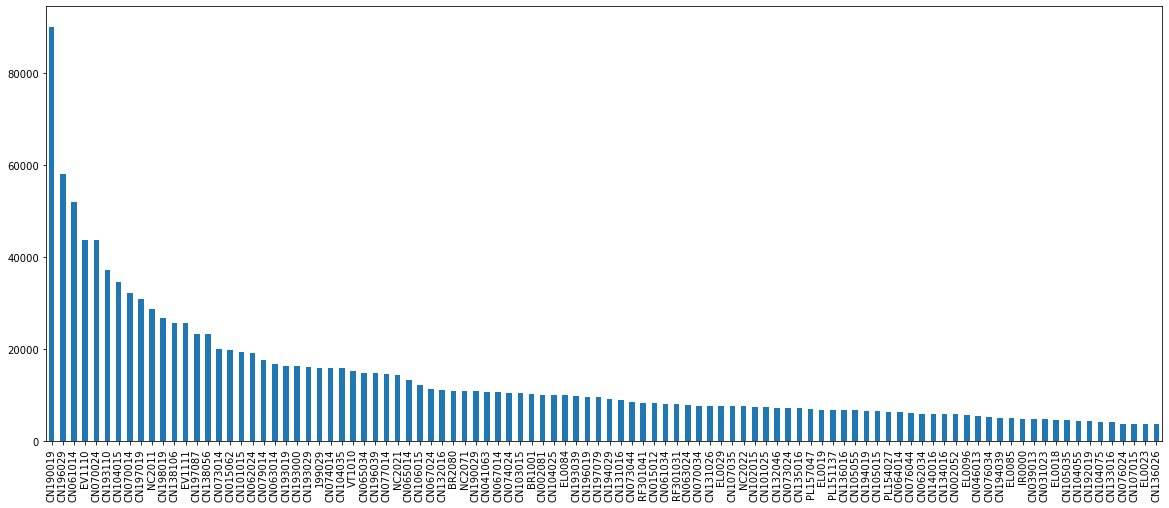

In [18]:
data['VIOLATION CODE'].value_counts(dropna = False)[:100].plot(kind="bar", figsize=(20,8))

#### VIOLATION STATUS

In [11]:
data['VIOLATION STATUS'].value_counts(dropna = False)

OPEN        1030958
COMPLIED     641247
NO ENTRY       5583
Name: VIOLATION STATUS, dtype: int64

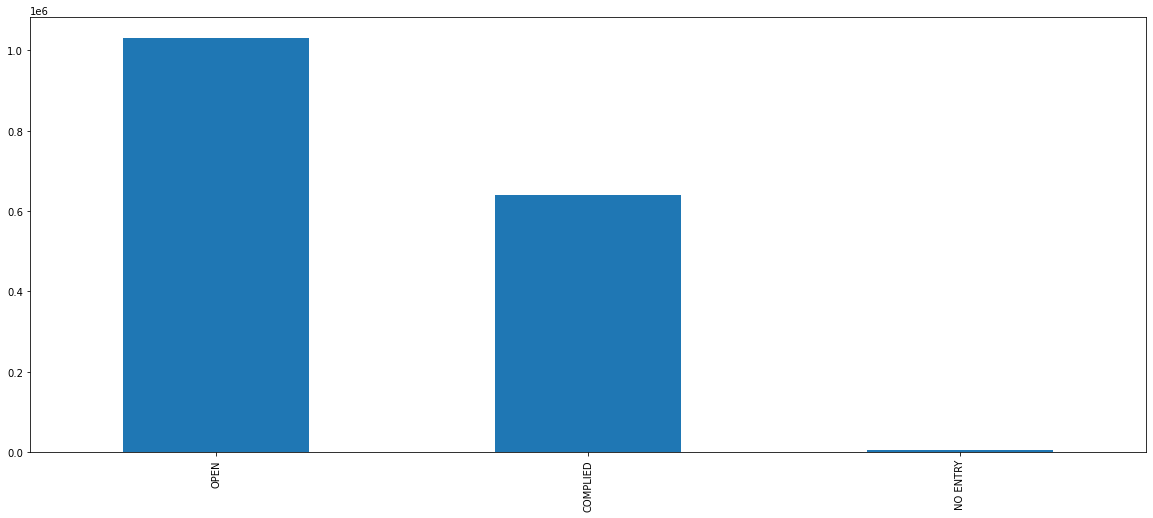

In [16]:
data['VIOLATION STATUS'].value_counts(dropna = False).plot(kind="bar", figsize=(20,8))

#### INSPECTION STATUS

In [13]:
data['INSPECTION STATUS'].value_counts(dropna = False)

FAILED    1159758
PASSED     293076
CLOSED     224784
HOLD          154
NaN            16
Name: INSPECTION STATUS, dtype: int64

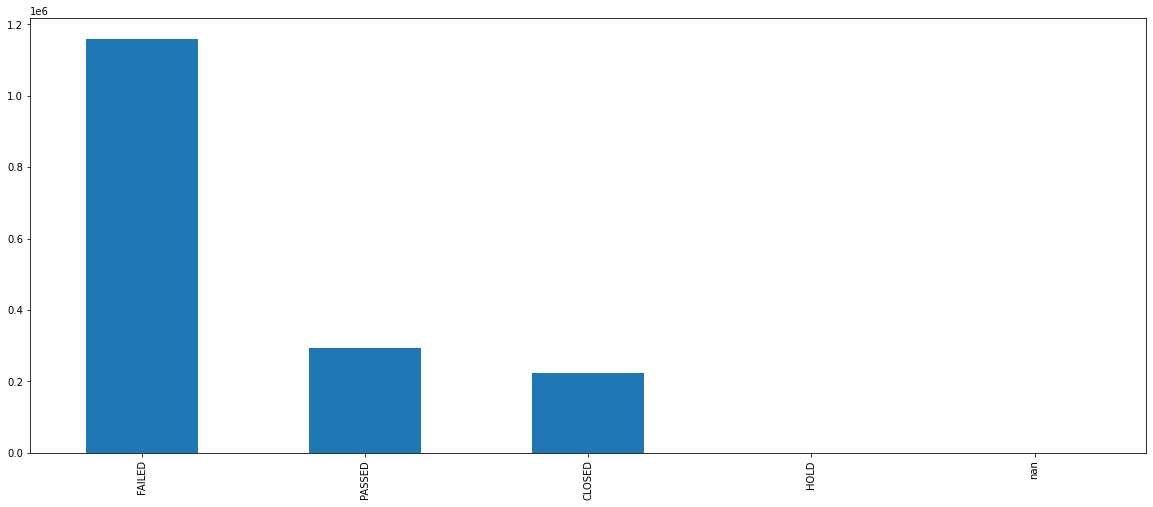

In [15]:
data['INSPECTION STATUS'].value_counts(dropna = False).plot(kind="bar", figsize=(20,8))

#### INSPECTION WAIVED

In [19]:
data['INSPECTION WAIVED'].value_counts(dropna = False)

N    1677788
Name: INSPECTION WAIVED, dtype: int64

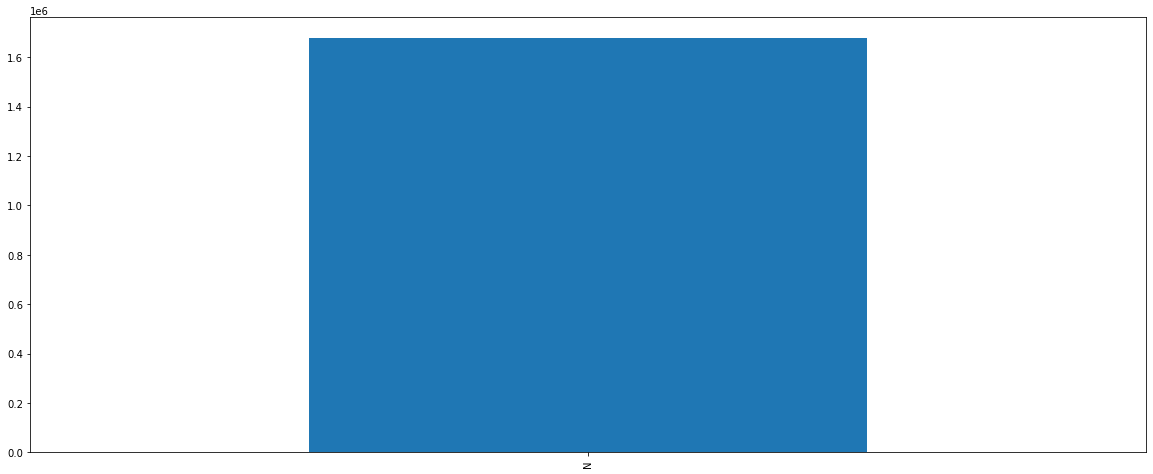

In [20]:
data['INSPECTION WAIVED'].value_counts(dropna = False).plot(kind="bar", figsize=(20,8))

#### INSPECTION CATEGORY

In [21]:
data['INSPECTION CATEGORY'].value_counts(dropna = False)

COMPLAINT       1186426
PERIODIC         415176
PERMIT            73600
REGISTRATION       2586
Name: INSPECTION CATEGORY, dtype: int64

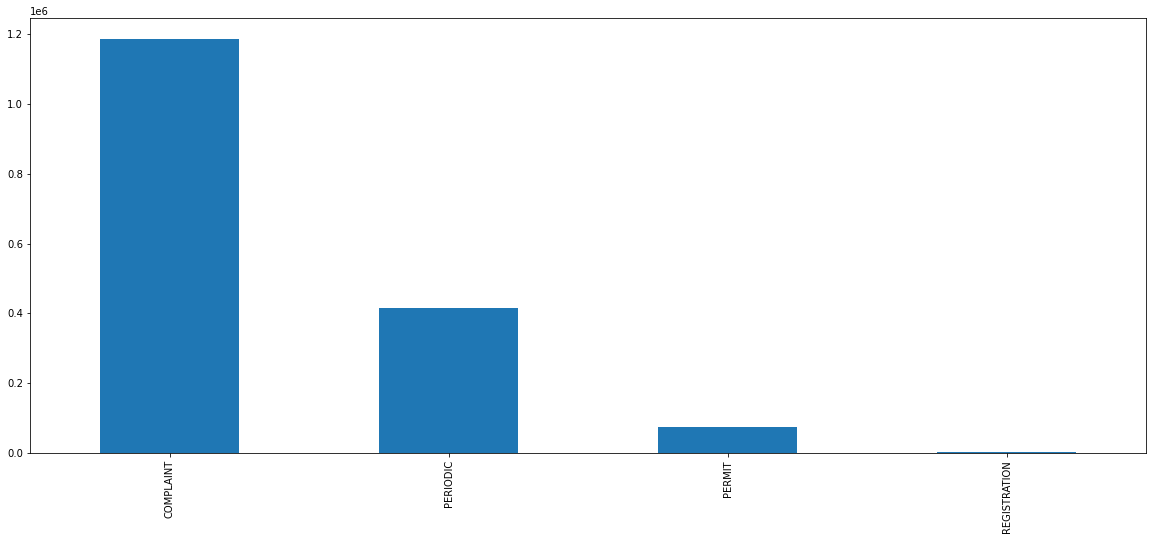

In [22]:
data['INSPECTION CATEGORY'].value_counts(dropna = False).plot(kind="bar", figsize=(20,8))

#### DEPARTMENT BUREAU

In [23]:
data['DEPARTMENT BUREAU'].value_counts(dropna = False)

CONSERVATION                  1110911
DEMOLITION                     125464
SPECIAL TASK FORCE             115885
ELEVATOR                        85805
ELECTRICAL                      37243
VENTILATION                     32108
BOILER                          31235
NEW CONSTRUCTION                29938
REFRIGERATION                   29681
PLUMBING                        28199
SPECIAL INSPECTION PROGRAM      21033
SIGNS                           14539
IRON                            14405
WATER                             786
CONSTRUCTION EQUIPMENT            556
Name: DEPARTMENT BUREAU, dtype: int64

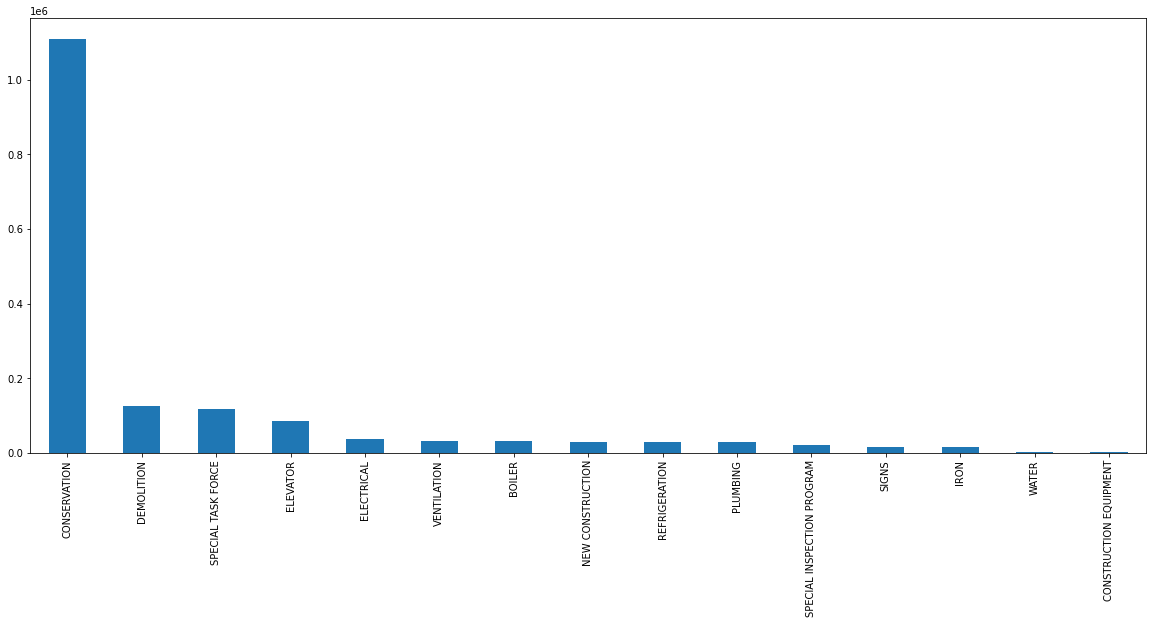

In [24]:
data['DEPARTMENT BUREAU'].value_counts(dropna = False).plot(kind="bar", figsize=(20,8))

#### STREET TYPE

In [41]:
data['STREET TYPE'].value_counts(dropna = False)

AVE     940725
ST      523743
BLVD     59536
PL       57665
RD       41100
DR       27145
NaN      13541
PKWY      6605
CT        3287
TER       2222
HWY       1559
PLZ        639
EXPY        10
WAY          8
LN           3
Name: STREET TYPE, dtype: int64

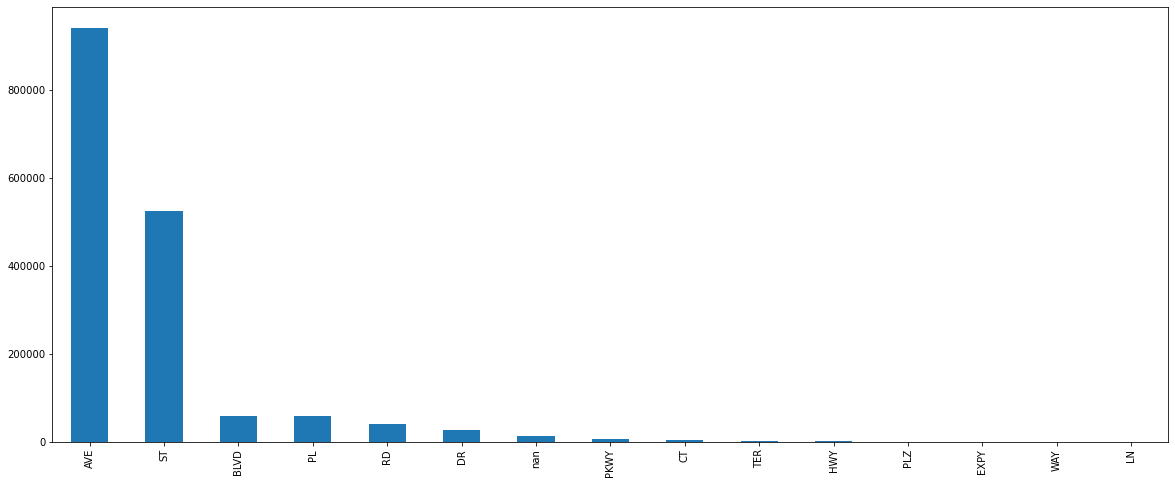

In [42]:
data['STREET TYPE'].value_counts(dropna = False).plot(kind="bar", figsize=(20,8))

### 2.2 数值属性

#### Community Areas

In [25]:
data['Community Areas'].describe() #5数概括

count    1.675509e+06
mean     3.873350e+01
std      2.008963e+01
min      1.000000e+00
25%      2.400000e+01
50%      3.600000e+01
75%      5.800000e+01
max      7.700000e+01
Name: Community Areas, dtype: float64

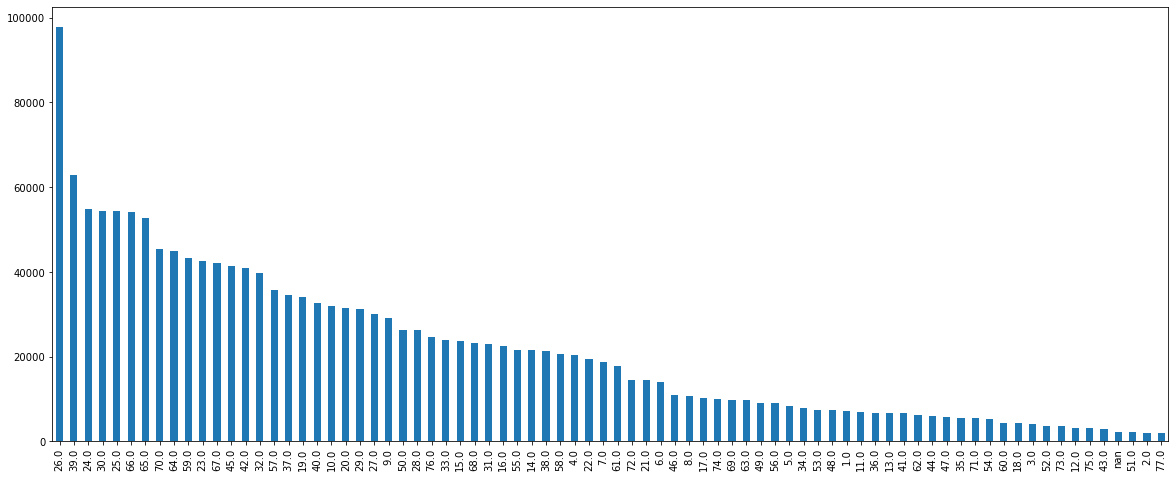

In [46]:
data['Community Areas'].value_counts(dropna = False).plot(kind="bar", figsize=(20,8))

In [26]:
data['Community Areas'].isnull().sum() #缺失值个数

2279

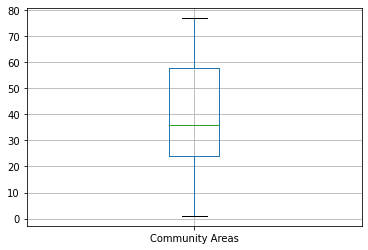

In [27]:
result = data.boxplot(['Community Areas'],return_type='dict')

In [29]:
result['fliers'][0].get_ydata().size

0

没有离群点

#### Census Tracts

In [30]:
data['Census Tracts'].describe() #5数概括

count    1.676243e+06
mean     3.800659e+02
std      2.290619e+02
min      1.000000e+00
25%      1.790000e+02
50%      3.740000e+02
75%      5.720000e+02
max      8.010000e+02
Name: Census Tracts, dtype: float64

In [31]:
data['Census Tracts'].isnull().sum() #缺失值个数

1545

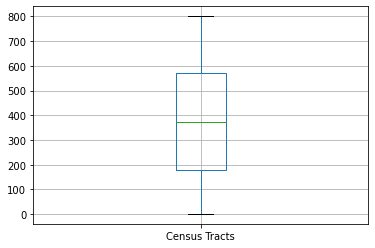

In [32]:
result = data.boxplot(['Census Tracts'],return_type='dict')

In [33]:
result['fliers'][0].get_ydata().size

0

没有离群点

#### Wards

In [34]:
data['Wards'].describe() #5数概括

count    1.675509e+06
mean     2.513030e+01
std      1.498690e+01
min      1.000000e+00
25%      1.200000e+01
50%      2.500000e+01
75%      3.700000e+01
max      5.000000e+01
Name: Wards, dtype: float64

In [35]:
data['Wards'].isnull().sum() #缺失值个数

2279

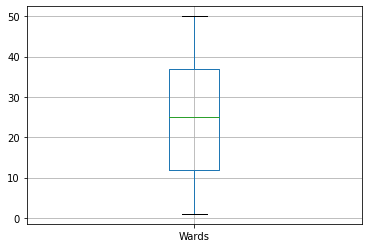

In [36]:
result = data.boxplot(['Wards'],return_type='dict')

In [38]:
result['fliers'][0].get_ydata().size

0

没有离群点

## 3. 数据缺失的处理

In [7]:
data.isnull().sum()

ID                                    0
VIOLATION LAST MODIFIED DATE          0
VIOLATION DATE                        0
VIOLATION CODE                        0
VIOLATION STATUS                      0
VIOLATION STATUS DATE           1036199
VIOLATION DESCRIPTION             10768
VIOLATION LOCATION               897282
VIOLATION INSPECTOR COMMENTS     175463
VIOLATION ORDINANCE               47581
INSPECTOR ID                          0
INSPECTION NUMBER                     0
INSPECTION STATUS                    16
INSPECTION WAIVED                     0
INSPECTION CATEGORY                   0
DEPARTMENT BUREAU                     0
ADDRESS                               0
STREET NUMBER                         0
STREET DIRECTION                      0
STREET NAME                           0
STREET TYPE                       13541
PROPERTY GROUP                        0
SSA                             1356267
LATITUDE                           1510
LONGITUDE                          1510


存在数据缺失的标称属性和数值属性有：INSPECTION STATUS、STREET TYPE、Community Areas、Census Tracts、Wards、Historical Wards 2003-2015，数据缺失的原因可能是由于忘记对其进行填写

### INSPECTION STATUS

由于INSPECTION STATUS缺失的数据极少，所以采用将缺失部分剔除的方法

In [44]:
data_dropna = data.dropna(subset=['INSPECTION STATUS'])

对比新旧数据集:

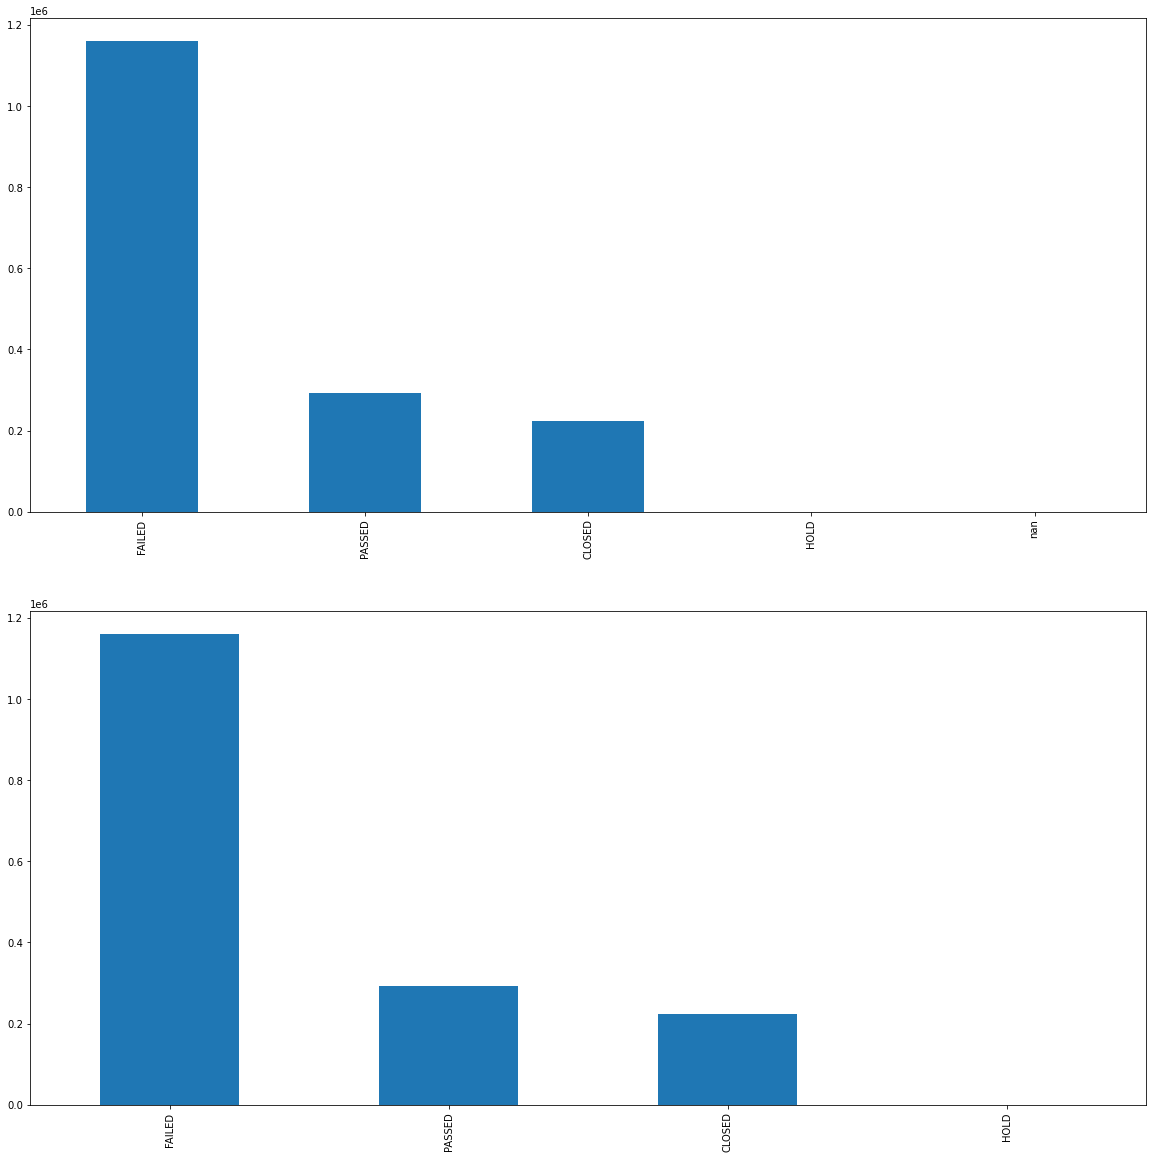

In [45]:
plt.figure(figsize=(20,20))
plt.subplot(2,1,1) 
data['INSPECTION STATUS'].value_counts(dropna = False).plot(kind="bar")
plt.subplot(2,1,2)
data_dropna['INSPECTION STATUS'].value_counts(dropna = False).plot(kind="bar")

### STREET TYPE和Community Areas

由于在STREET TYPE、Community Areas中，大量的数据都集中在最高频率值对应的数据，所以采用用最高频率值来填补缺失值的方法

In [49]:
street_type_fillna = data_dropna['STREET TYPE'].fillna(data['STREET TYPE'].mode()[0])
community_areas_fillna = data_dropna['Community Areas'].fillna(data['Community Areas'].mode()[0])

对比新旧数据集:

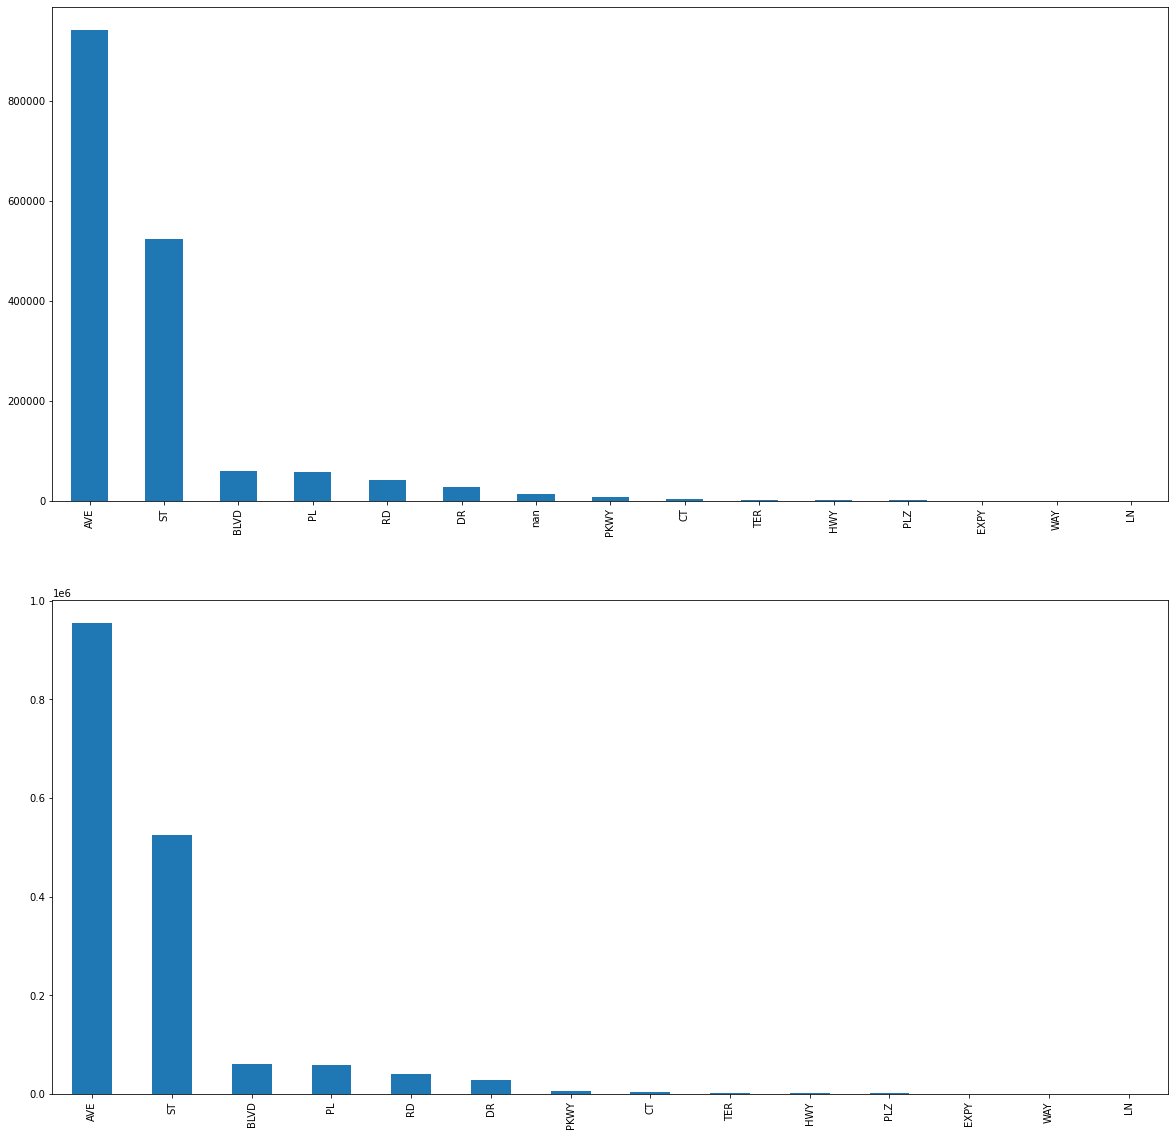

In [50]:
plt.figure(figsize=(20,20))
plt.subplot(2,1,1) 
data['STREET TYPE'].value_counts(dropna = False).plot(kind="bar")
plt.subplot(2,1,2) 
street_type_fillna.value_counts(dropna = False).plot(kind="bar")

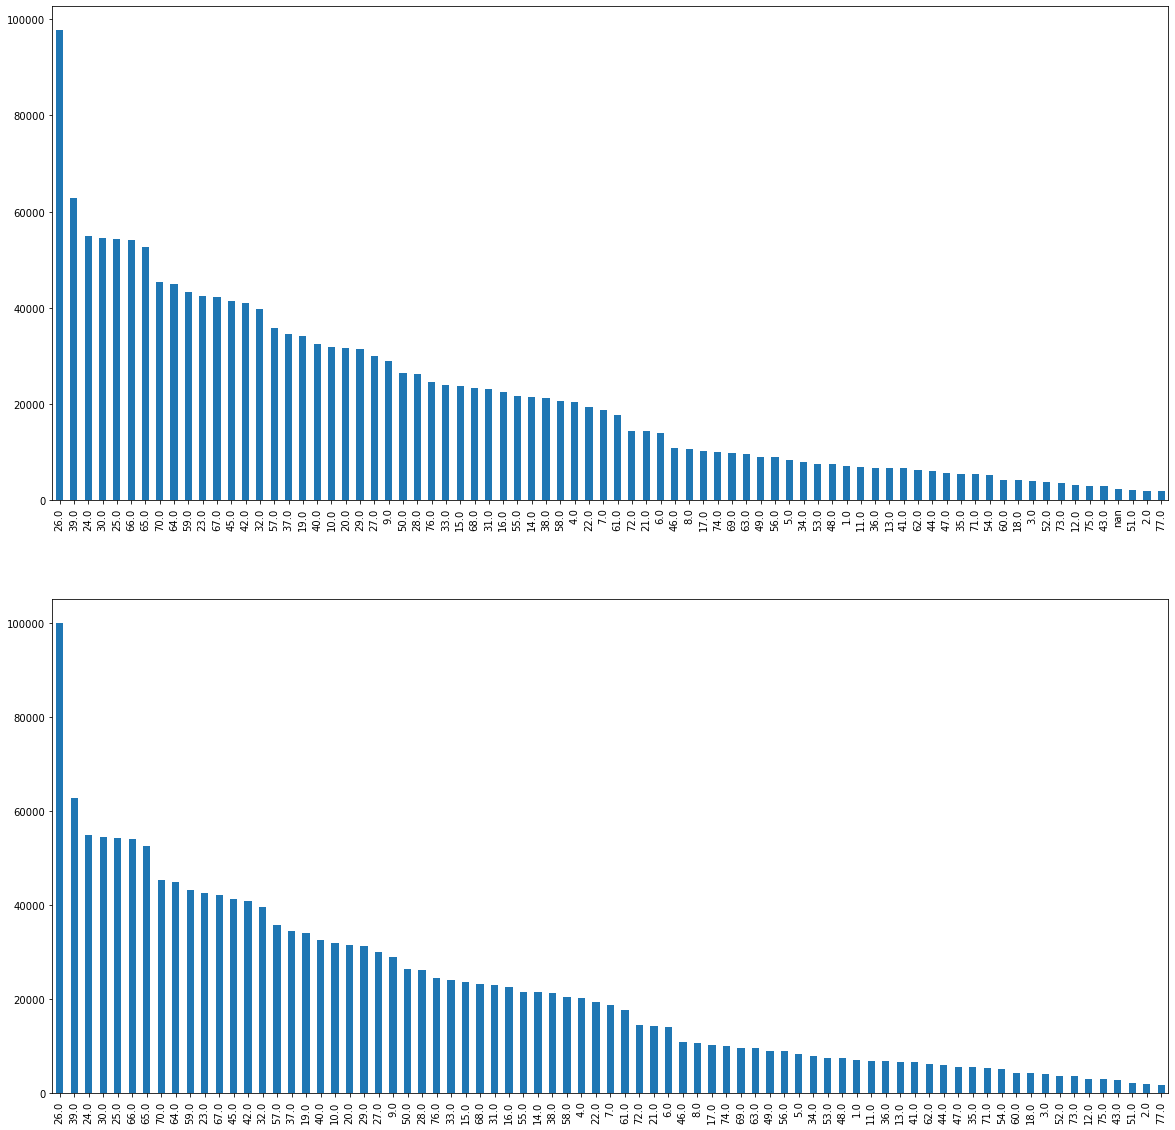

In [56]:
plt.figure(figsize=(20,20))
plt.subplot(2,1,1) 
data['Community Areas'].value_counts(dropna = False).plot(kind="bar")
plt.subplot(2,1,2) 
community_areas_fillna.value_counts(dropna = False).plot(kind="bar")

### Census Tracts、Wards、Historical Wards 2003-2015

对于这三个属性，采用用平均值来填补缺失值的方法

In [53]:
census_tracts_fillna = data_dropna['Census Tracts'].fillna(data['Census Tracts'].mean())
wards_fillna = data_dropna['Wards'].fillna(data['Wards'].mean())
historical_wards_fillna = data_dropna['Historical Wards 2003-2015'].fillna(data['Wards'].mean())                           

对比新旧数据集:

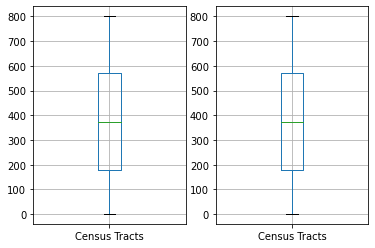

In [60]:
plt.figure()
plt.subplot(1,2,1) 
data.boxplot(['Census Tracts'])
plt.subplot(1,2,2) 
pd.DataFrame(census_tracts_fillna).boxplot()

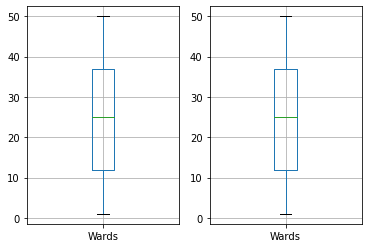

In [61]:
plt.figure()
plt.subplot(1,2,1) 
data.boxplot(['Wards'])
plt.subplot(1,2,2) 
pd.DataFrame(wards_fillna).boxplot()

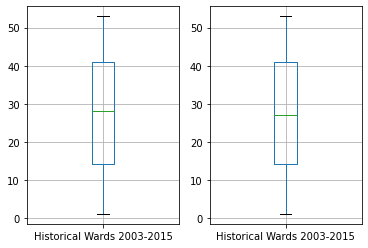

In [62]:
plt.figure()
plt.subplot(1,2,1) 
data.boxplot(['Historical Wards 2003-2015'])
plt.subplot(1,2,2) 
pd.DataFrame(historical_wards_fillna).boxplot()